In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("D:\sentiment_analysis\Train.csv")

In [3]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [4]:
data.shape

(40000, 2)

In [5]:
data = data.iloc[:1000,:]

In [6]:
data.shape

(1000, 2)

### Working with label

In [7]:
data['label'].value_counts()

0    522
1    478
Name: label, dtype: int64

<AxesSubplot: >

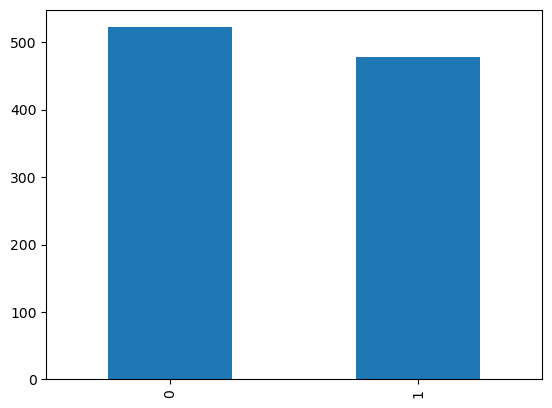

In [8]:
data['label'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'label distribution')

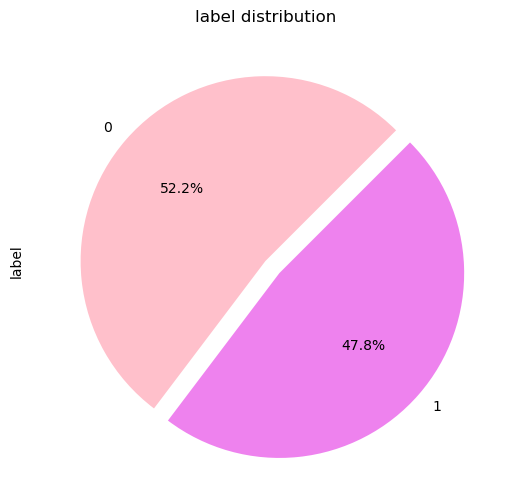

In [9]:
plt.figure(figsize = (10,6))
colors = ['pink','violet']
data['label'].value_counts().plot(kind='pie',autopct='%.1f%%',shadow = False,colors= colors,startangle=45,explode=(0,0.1))
plt.title('label distribution')

In [10]:
data['text'][999]

'...but I regret having seen it. Since the ratings on IMDb are relatively high (and they must also have been relatively high on Netflix), I guess I put it in my queue because it is advertised as a gentle comedy from the UK, a category that has produced many films I liked immensely. "Saving Grace," on the other hand, falls into the category of laugh-less comedies usually populated by Hollywood movies produced and directed by the talentless. Brenda Blethyn is a capable actress, and I have liked her in other movies. The concept -- a gardener growing marijuana to overcome the penury she finds herself confronting after her husband\'s death -- does not offend me. Notwithstanding the strenuous efforts on the part of the cast to produce humor, the film falls flat on its face (falling flat on its arse might have been funnier) as far as I and my wife were concerned. Be forewarned, oh gentle reader, not all offbeat British comedies succeed. This one is a dud.'

In [11]:
import re
import nltk
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

In [12]:
stopwords_set = set(stopwords.words('english'))
emoji_pattern = re.compile('(?::|;|=)(?:-)?(?:\)|\(|D|P)')

def preprocessing(text):
    text = re.sub('<[^>]*>', '', text)
    emojis = emoji_pattern.findall(text)
    text = re.sub('[\W+]', ' ', text.lower()) + ' '.join(emojis).replace('-', '')

    prter = PorterStemmer()
    text = [prter.stem(word) for word in text.split() if word not in stopwords_set]

    return " ".join(text)

In [13]:
preprocessing('this is my tags <h1> :) <p>helo world<p> <div> <div> </h2>')

'tag helo world :)'

In [14]:
data['text'] = data['text'].apply(lambda x: preprocessing(x))

In [15]:
data['text']

0      grew b 1965 watch love thunderbird mate school...
1      put movi dvd player sat coke chip expect hope ...
2      peopl know particular time past like feel need...
3      even though great interest biblic movi bore de...
4      im die hard dad armi fan noth ever chang got t...
                             ...                        
995    oh bad funni way one could explain someth like...
996    believ terribl movi actual made worst actor co...
997    even though slightli older recommend age group...
998    read web site bett davi one find instanc autho...
999    regret seen sinc rate imdb rel high must also ...
Name: text, Length: 1000, dtype: object

### Visualizing negative and positive words

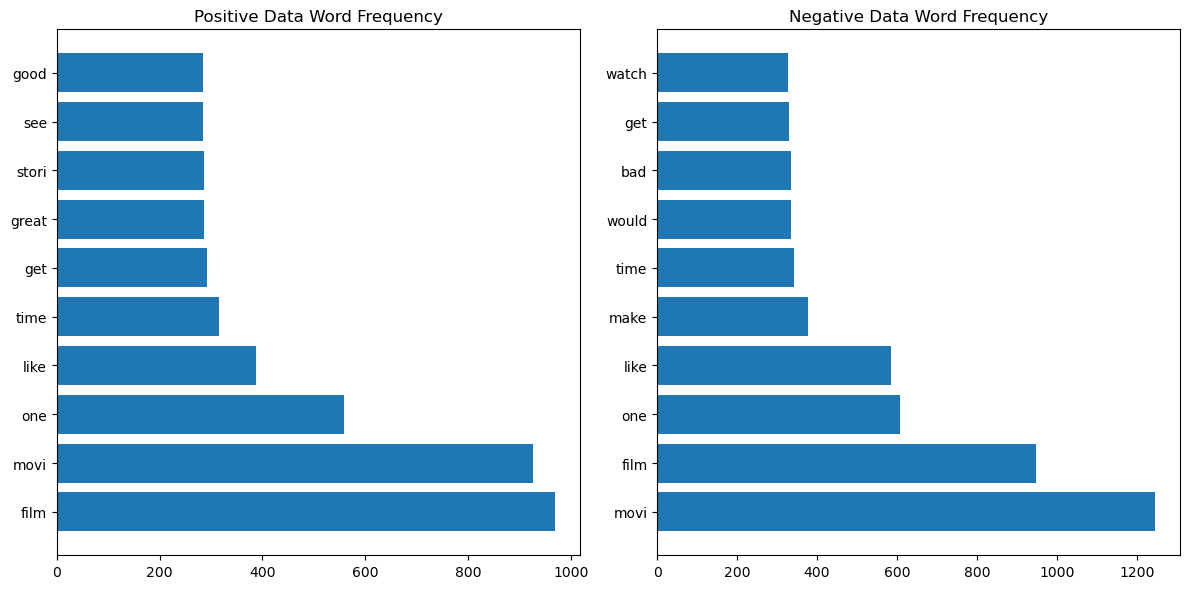

In [16]:
positivedata = data[data['label']==1]
positivedata = positivedata['text']
negdata = data[data['label']==0]
negdata = negdata['text']

import matplotlib.pyplot as plt
from collections import Counter

# Positive data
positivedata_words = ' '.join(positivedata).split()
positivedata_words_counts = Counter(positivedata_words)
positivedata_common_words =positivedata_words_counts.most_common(10)

# Negative data
negdata_words = ' '.join(negdata).split()
negdata_words_counts = Counter(negdata_words)
negdata_common_words = negdata_words_counts.most_common(10)

#Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Positive data word frequency
axes[0].barh(range(len(positivedata_common_words)), [count for _, count in positivedata_common_words], align='center')
axes[0].set_yticks(range(len(positivedata_common_words)))
axes[0].set_yticklabels([word for word, _ in positivedata_common_words])
axes[0].set_title('Positive Data Word Frequency')

# Negative data word frequency
axes[1].barh(range(len(negdata_common_words)), [count for _, count in negdata_common_words], align='center')
axes[1].set_yticks(range(len(negdata_common_words)))
axes[1].set_yticklabels([word for word, _ in negdata_common_words])
axes[1].set_title('Negative Data Word Frequency')

plt.tight_layout()
plt.show()

### TF-IDF Vectorizer to convert the raw documents into feature matrix

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None,use_idf=True,norm='l2',smooth_idf=True)
y=data.label.values
x=tfidf.fit_transform(data.text)

### Train

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.5,shuffle=False)

In [19]:
from sklearn.linear_model import LogisticRegressionCV
clf=LogisticRegressionCV(cv=6,scoring='accuracy',random_state=0,n_jobs=-1,verbose=3,max_iter=500).fit(X_train,y_train)
y_pred = clf.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   6 | elapsed:   56.5s remaining:  1.9min
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  1.3min finished


### Accuracy

In [20]:
from sklearn import metrics

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.79


### Prediction

In [21]:
def prediction(comment):
    preprocessed_comment = preprocessing(comment)
    comment_list = [preprocessed_comment]  # Wrap the preprocessed comment in a list
    comment_vector = tfidf.transform(comment_list)
    prediction = clf.predict(comment_vector)[0]
    return prediction



prediction = prediction('one cerebr insight movi ever seen script languag costum sceneri plot charact etc suprem bore watch intens even listen movi work mani time lost count scarlett age grace acquir wisdom beyond year end movi take tara ireland famili origin see result anoth civil war play time irish english movi depict doubl standard men time man still respect girlfriend whore woman mere seen privat place man societi accus improprieti cours scarlett alway think outsid box break rule necessari creat need chang help peopl surviv scarlett beauti definit bone strength self esteem wisdom grow age rememb line confront much plate tomorrow anoth day way carri determin courag learn experi good movi show daughter teach woman import respect men especi handsom one two side may treat woman differ depend act respect attract woman need learn movi teach movi like therapi better gone wind second part take place ireland anyon irish decent cherish sceneri peopl scarlett charact within')

In [22]:
if prediction == 1:
    print("positive comment")
else:
    print("negative comment")
    

positive comment


In [23]:
data['text'][999]

'regret seen sinc rate imdb rel high must also rel high netflix guess put queue advertis gentl comedi uk categori produc mani film like immens save grace hand fall categori laugh less comedi usual popul hollywood movi produc direct talentless brenda blethyn capabl actress like movi concept garden grow marijuana overcom penuri find confront husband death offend notwithstand strenuou effort part cast produc humor film fall flat face fall flat ars might funnier far wife concern forewarn oh gentl reader offbeat british comedi succeed one dud'

In [24]:
data['text'][0]

'grew b 1965 watch love thunderbird mate school watch play thunderbird school lunch school want virgil scott one want alan count 5 becam art form took children see movi hope would get glimps love child bitterli disappoint high point snappi theme tune could compar origin score thunderbird thank earli saturday morn one televis channel still play rerun seri gerri anderson wife creat jonatha frake hand director chair version complet hopeless wast film utter rubbish cgi remak may accept replac marionett homo sapien subsp sapien huge error judgment'

In [25]:
import pickle
pickle.dump(clf,open('clf.pkl','wb'))
pickle.dump(tfidf,open('tfidf.pkl','wb'))